# Import Modules
You may need to install some of them.
But if you activate the environment inside this `examples` folder, all dependencies should be included.

In [2]:
using Pkg
Pkg.instantiate()

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/fxw/.julia/dev/DeconvOptim.jl/examples/Manifest.toml:0


In [6]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow, FFTW, ImageShow

In [3]:
img = convert(Array{Float32}, testimage("simple_3d_ball"))
psf = permutedims(ifftshift(OffsetArrays.no_offset_view(
            Float32.(testimage("simple_3d_psf")))), (3,1,2))
psf ./= sum(psf)
# create a blurred, noisy version of that image
img_b = conv(img, psf, [1, 2, 3])
img_n = poisson(img_b, 300);

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


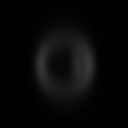

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


In [9]:
Gray.(img_b[:, :, 32])

In [10]:
# the regularizer must be now adapted since we want to have
# a 3D one
reg1 = TV(num_dims=3, sum_dims=[1, 2, 3])
reg2 = Tikhonov(num_dims=3, sum_dims=[1, 2, 3])

#167 (generic function with 1 method)

In [13]:
@time res, ores = deconvolution(img_n, psf, regularizer=reg1, loss=Poisson(),
                          λ=0.02, padding=0.2, iterations=6);
@time res2, ores = deconvolution(img_n, psf, regularizer=reg2, loss=Poisson(),
                          λ=0.001, padding=0.0, iterations=6);

  0.373910 seconds (8.62 k allocations: 380.704 MiB, 1.66% gc time)
  0.079915 seconds (5.64 k allocations: 126.591 MiB, 3.02% gc time)


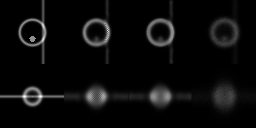

In [15]:
img_comb1 = [img[32, :, :] res2[32, :, :] res[32, :, :] img_n[32, :, :]]
img_comb2 = [img[:, : ,43] res2[:, :, 43] res[:, :, 43] img_n[:, :, 43]]

img_comb = cat(img_comb1, img_comb2, dims=1)
img_comb ./= maximum(img_comb)

Gray.(img_comb)